# Challenge Caja los Andes: Para puesto de Data Scientist

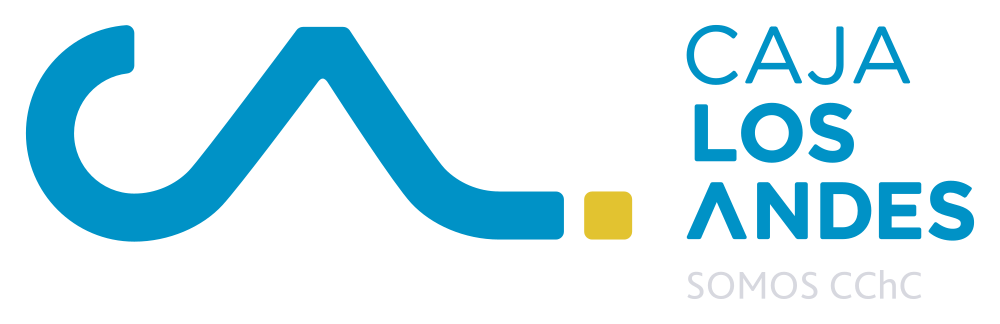

In [1]:
from IPython.display import SVG, display
def show_svg():
    display(SVG(url='https://upload.wikimedia.org/wikipedia/commons/3/34/Logotipo_Caja_Los_Andes.svg'))
show_svg()

## a 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statistics import mean
from matplotlib import pyplot
import matplotlib.patches as mpatches
import time
from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, RepeatedStratifiedKFold, GridSearchCV, KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler


colors = ["#0101DF", "#DF0101"]

df = pd.read_csv("../data/raw/dataset_Caso_1.csv")
df.info(verbose= "True")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2000 non-null   float64
 1   x2      2000 non-null   float64
 2   x3      2000 non-null   object 
 3   x4      2000 non-null   object 
 4   x5      2000 non-null   int64  
 5   x6      2000 non-null   int64  
 6   x7      2000 non-null   int64  
 7   x8      2000 non-null   float64
 8   target  2000 non-null   int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 140.8+ KB


In [3]:
df.head(5)

,x1,x2,x3,x4,x5,x6,x7,x8,target
0,50.1341,-326.0000,SAT,MZBER,0,0,6,-6.5,0
1,50.1341,-326.0000,SAT,MZBER,0,0,6,-4.5,0
2,124.3276,-275.1935,LCV,MZBER,0,0,3,-2.5,0
3,50.1341,-326.0000,SAT,MZBER,0,0,3,-4.5,0
4,85.3905,-298.8632,XJB,MZBER,0,0,5,-4.5,0


In [4]:
df.describe()

,x1,x2,x5,x6,x7,x8,target
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000
mean,101.074885,-298.282145,0.01250,0.027000,3.440500,-5.343500,0.011000
std,22.670474,16.596490,0.11113,0.162124,0.972591,1.570108,0.104329
min,50.134100,-326.000000,0.00000,0.000000,3.000000,-7.500000,0.000000
25%,89.501675,-308.930400,0.00000,0.000000,3.000000,-6.500000,0.000000
50%,105.236100,-297.825600,0.00000,0.000000,3.000000,-5.500000,0.000000
75%,116.023175,-288.169025,0.00000,0.000000,3.000000,-4.500000,0.000000
max,150.134100,-226.000000,1.00000,1.000000,8.000000,-1.500000,1.000000


In [5]:
# WE seek for null elements in the dataset
df.isnull().sum().max()

0

In [6]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['target'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['target'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 98.9 % of the dataset
Frauds 1.1 % of the dataset


*Resumen de los datos:*
1. Cambiar x3,x4,x8 por cantidades enteras.
2. Clasificación binaria.
3. Estandarizar rango en cada columna to obtain better performance.
4. Conjunto pequeño de datos por lo que admite tecnicas de ML más especificas sin precuparse por el gasto computacional.

## Preprocesamiento de los datos

In [7]:
import os
# Fix point 1.

df['x3'] = pd.Categorical(df['x3']).codes
df['x4'] = pd.Categorical(df['x4']).codes
df['x8'] = pd.Categorical(df['x8']).codes

# Fix 3: We standarize column values in every row that has type float64

scaler = StandardScaler()
float64_columns = df.select_dtypes(include=['float64']).columns

for column in float64_columns:
    df[column] = scaler.fit_transform(df[[column]])

# Save the DataFrame as a CSV file to a given path
csv_path = '../data/processed/Dataframe.csv' 

# Check if the file already exists
if not os.path.exists(csv_path):
    df.to_csv(csv_path, index=False)
    print(f"File saved successfully at {csv_path}")
else:
    print(f"File already exists at {csv_path}. Please choose a different path or filename.")

df.describe()


File already exists at ../data/processed/Dataframe.csv. Please choose a different path or filename.


,x1,x2,x3,x4,x5,x6,x7,x8,target
count,2.000000e+03,2.000000e+03,2000.000000,2000.00000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000
mean,2.664535e-16,1.203482e-15,1.174500,0.06650,0.01250,0.027000,3.440500,2.156500,0.011000
std,1.000250e+00,1.000250e+00,1.162207,0.34371,0.11113,0.162124,0.972591,1.570108,0.104329
min,-2.247572e+00,-1.670521e+00,0.000000,0.00000,0.00000,0.000000,3.000000,0.000000,0.000000
25%,-5.106247e-01,-6.417573e-01,0.000000,0.00000,0.00000,0.000000,3.000000,1.000000,0.000000
50%,1.835981e-01,2.751539e-02,1.000000,0.00000,0.00000,0.000000,3.000000,2.000000,0.000000
75%,6.595375e-01,6.095053e-01,2.000000,0.00000,0.00000,0.000000,3.000000,3.000000,0.000000
max,2.164555e+00,4.356356e+00,3.000000,3.00000,1.00000,1.000000,8.000000,6.000000,1.000000


In [8]:
df.info(verbose= "True")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2000 non-null   float64
 1   x2      2000 non-null   float64
 2   x3      2000 non-null   int8   
 3   x4      2000 non-null   int8   
 4   x5      2000 non-null   int64  
 5   x6      2000 non-null   int64  
 6   x7      2000 non-null   int64  
 7   x8      2000 non-null   int8   
 8   target  2000 non-null   int64  
dtypes: float64(2), int64(4), int8(3)
memory usage: 99.7 KB


## EDA

Now we create suitable visual information about df, then we get a inuition about the bevaviour of our dataset

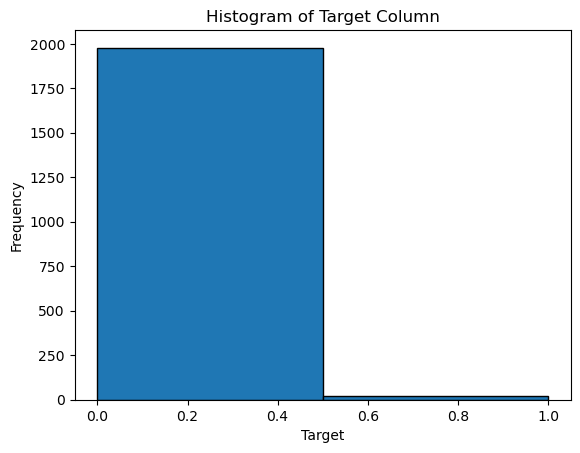

In [9]:
# Create histogram for the "target" column
plt.hist(df['target'], bins=2, edgecolor='black')
plt.title('Histogram of Target Column')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

C:\Users\aaihs\AppData\Local\Temp\ipykernel_22312\2944265773.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="target", y="x1", data=df, palette=colors, ax=axes[0])
C:\Users\aaihs\AppData\Local\Temp\ipykernel_22312\2944265773.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="target", y="x5", data=df, palette=colors, ax=axes[1])
C:\Users\aaihs\AppData\Local\Temp\ipykernel_22312\2944265773.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="target", y="x5", data=df, palette=colors, ax=axes[2])


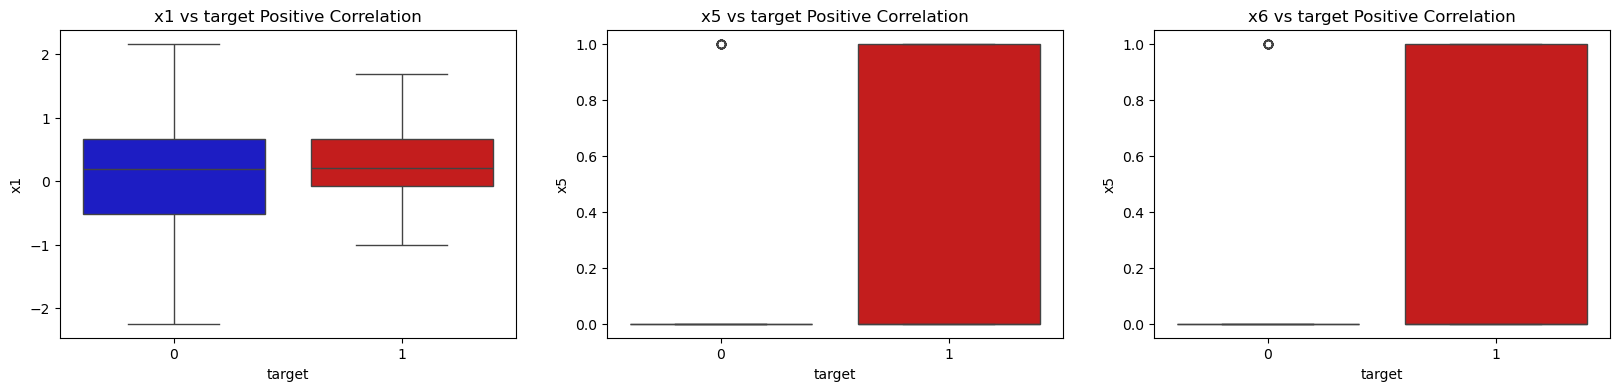

In [10]:
f, axes = plt.subplots(ncols=3, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="target", y="x1", data=df, palette=colors, ax=axes[0])
axes[0].set_title('x1 vs target Positive Correlation')

sns.boxplot(x="target", y="x5", data=df, palette=colors, ax=axes[1])
axes[1].set_title('x5 vs target Positive Correlation')

sns.boxplot(x="target", y="x5", data=df, palette=colors, ax=axes[2])
axes[2].set_title('x6 vs target Positive Correlation')

plt.show()

C:\Users\aaihs\AppData\Local\Temp\ipykernel_22312\2419300361.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x2_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
C:\Users\aaihs\AppData\Local\Temp\ipykernel_22312\2419300361.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x3_fraud_dist,ax=ax2

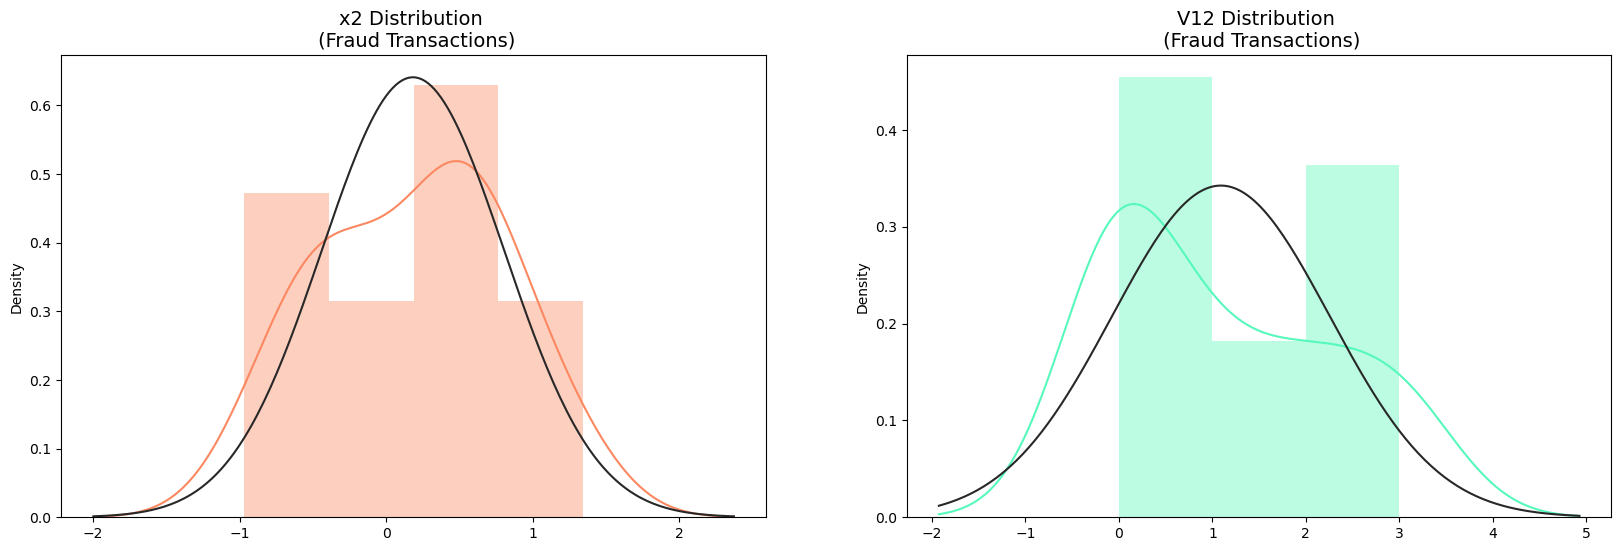

In [11]:
from scipy.stats import norm

f, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 6))

x2_fraud_dist = df['x2'].loc[df['target'] == 1].values
sns.distplot(x2_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('x2 Distribution \n (Fraud Transactions)', fontsize=14)

x3_fraud_dist = df['x3'].loc[df['target'] == 1].values
sns.distplot(x3_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

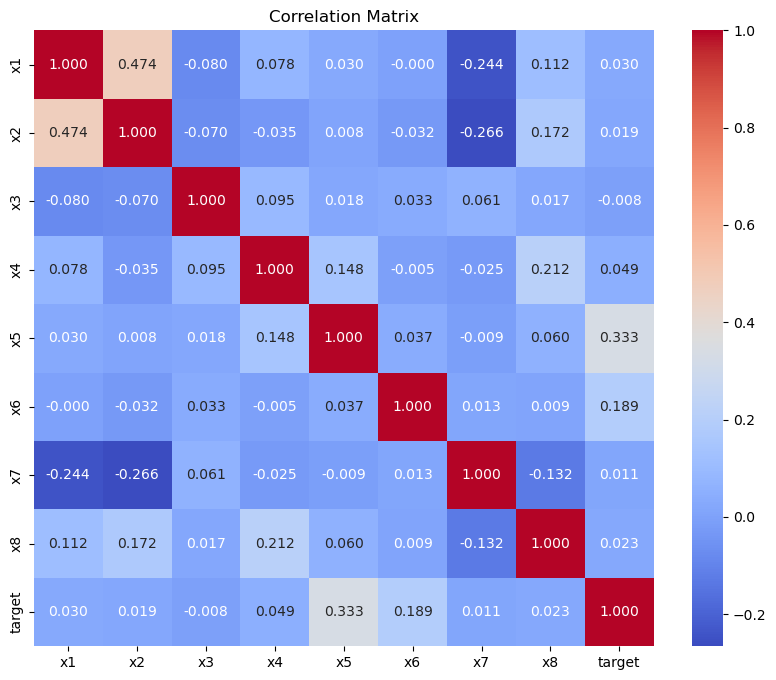

In [12]:
# Compute correlation matrix with 3 decimal precision and plot
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.3f')
plt.title('Correlation Matrix')
plt.show()

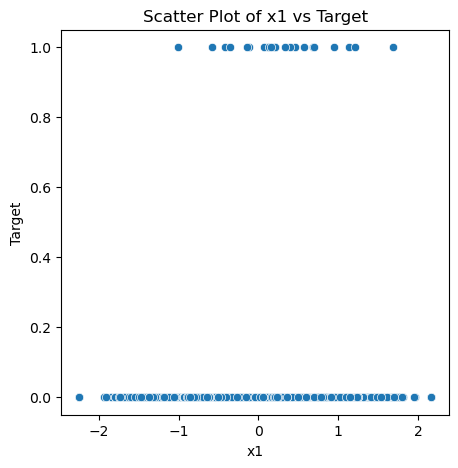

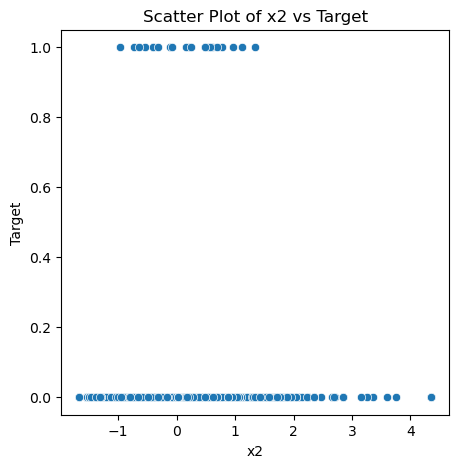

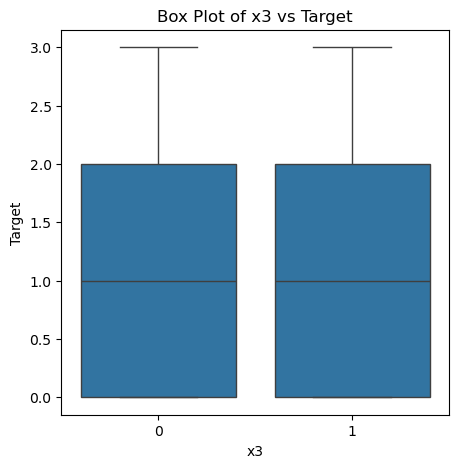

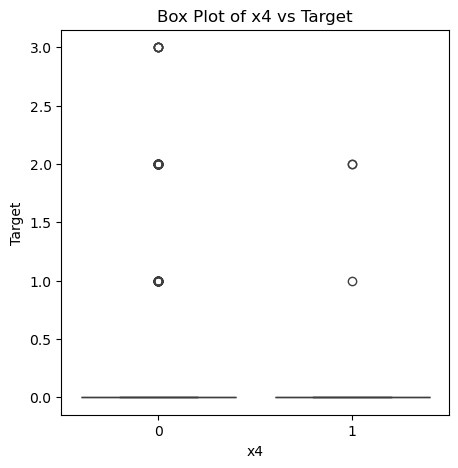

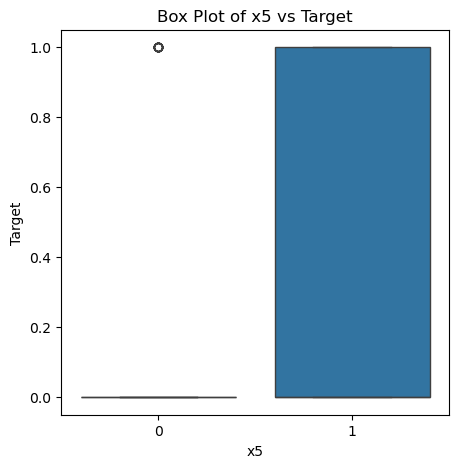

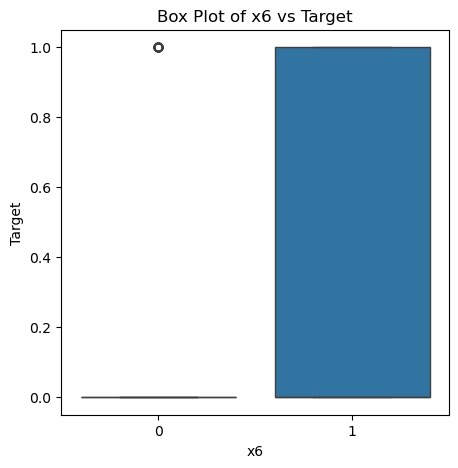

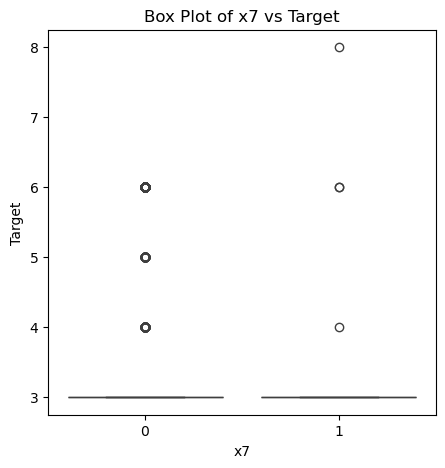

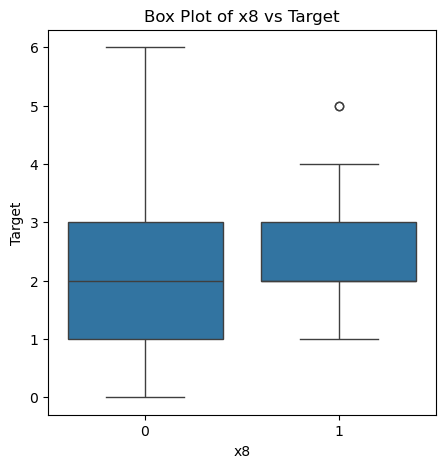

In [13]:
for column in df.columns:
    if column != 'target':
        plt.figure(figsize=(5,5))
        if df[column].dtype == 'float64':
            sns.scatterplot(x=df[column], y=df['target'])
            plt.title(f'Scatter Plot of {column} vs Target')
        else:
            sns.boxplot(x=df['target'], y=df[column])
            plt.title(f'Box Plot of {column} vs Target')
        plt.xlabel(column)
        plt.ylabel('Target')
        plt.show()

## SMOTE method


In [422]:
# New_df is from the random undersample data (fewer instances)
X = df.drop('target', axis=1)
y = df['target']

oversample = SMOTE()
over_X, over_y = oversample.fit_resample(X, y)

# Split the data into training and testing sets with relation 80/20, respectively
over_X, X_test, y_train, y_test = train_test_split(over_X, over_y, test_size=0.2, random_state=42)

# List of models to try
model = RandomForestClassifier(n_estimators=150, random_state=0)

# Train and evaluate each model
model.fit(X_train, y_train)
name = "RF"      

ValueError: Found input variables with inconsistent numbers of samples: [2782, 3164]

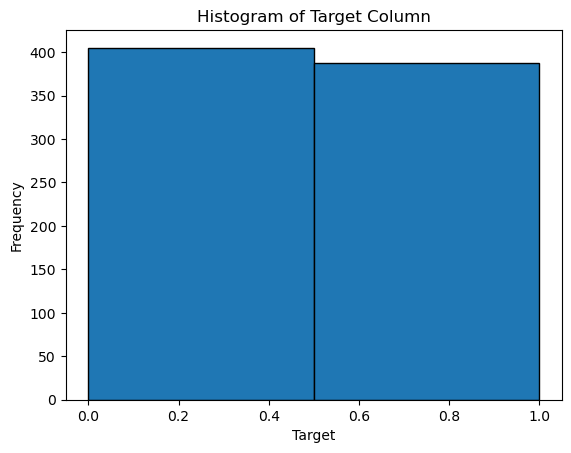

In [15]:
# Create histogram for the "target" column
plt.hist(y_test, bins=2, edgecolor='black')
plt.title('Histogram of Target Column')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

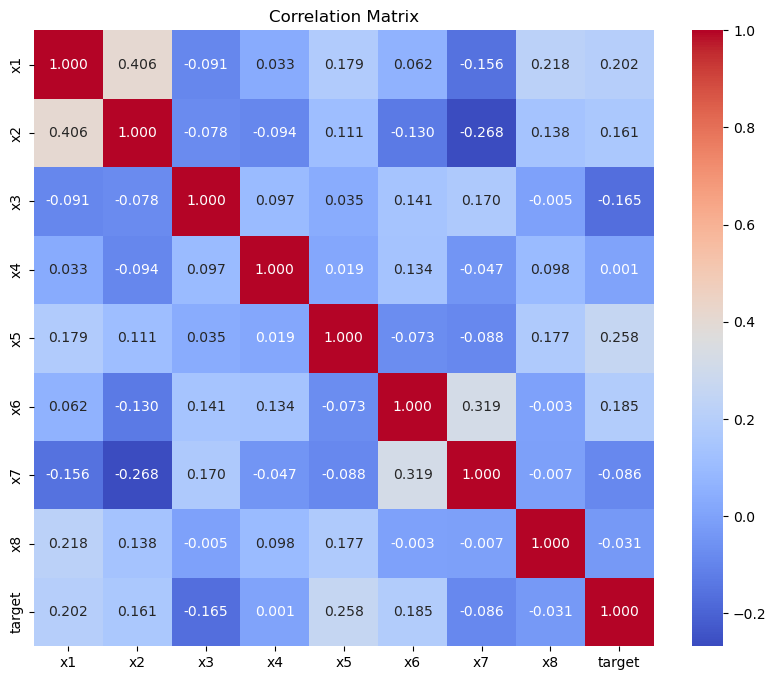

In [16]:
oversampled_df = pd.DataFrame(over_X, columns=X.columns)
oversampled_df['target'] = over_y
# Compute correlation matrix with 3 decimal precision and plot
corr_matrix = oversampled_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.3f')
plt.title('Correlation Matrix')
plt.show()

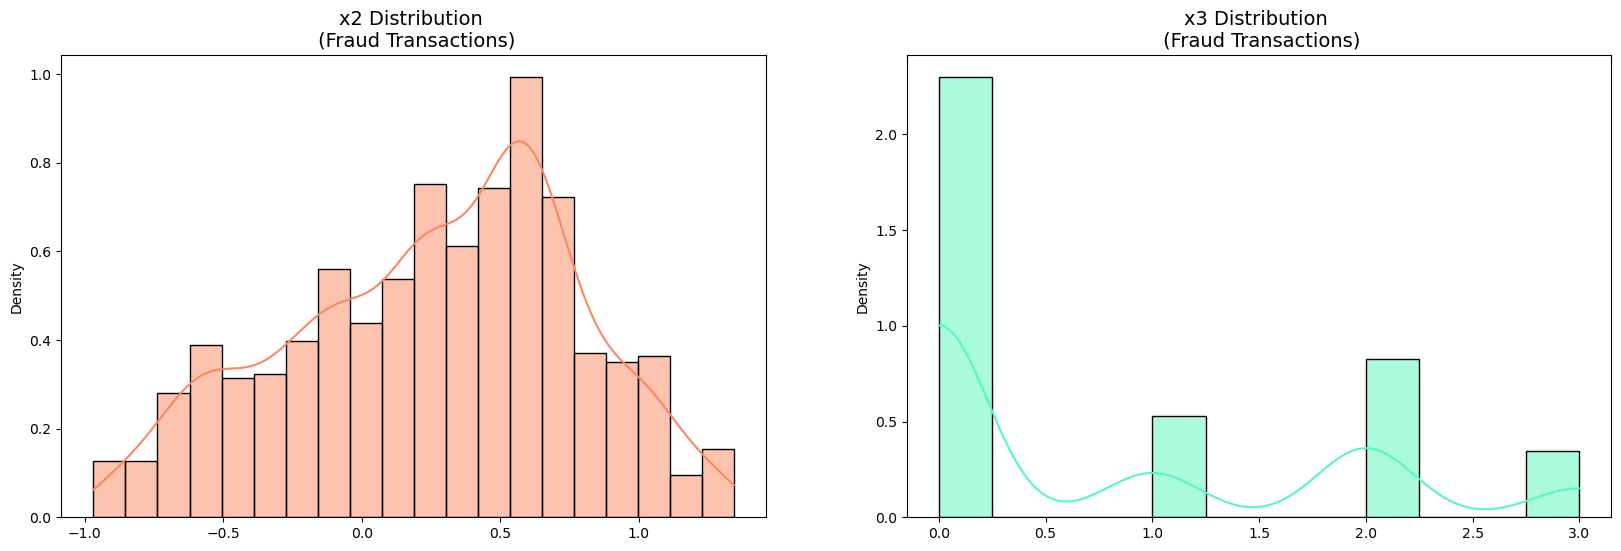

In [17]:
from scipy.stats import norm

# Create subplots
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# x2 Distribution for Fraud Transactions
x2_fraud_dist = oversampled_df['x2'].loc[oversampled_df['target'] == 1].values
sns.histplot(x2_fraud_dist, ax=ax1, kde=True, stat="density", color='#FB8861')
ax1.set_title('x2 Distribution \n (Fraud Transactions)', fontsize=14)

# x3 Distribution for Fraud Transactions
x3_fraud_dist = oversampled_df['x3'].loc[oversampled_df['target'] == 1].values
sns.histplot(x3_fraud_dist, ax=ax2, kde=True, stat="density", color='#56F9BB')
ax2.set_title('x3 Distribution \n (Fraud Transactions)', fontsize=14)

# Show the plot
plt.show()

In [18]:
oversampled_df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,target
count,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000
mean,0.159922,0.128493,0.990394,0.064965,0.077856,0.071284,3.360465,2.110718,0.500000
std,0.807734,0.809118,1.119829,0.298460,0.267979,0.257331,0.918689,1.336969,0.500063
min,-2.247572,-1.670521,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,-0.136805,-0.351198,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000
50%,0.234249,0.216371,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,0.500000
75%,0.627083,0.626912,2.000000,0.000000,0.000000,0.000000,3.000000,3.000000,1.000000
max,2.164555,4.356356,3.000000,3.000000,1.000000,1.000000,8.000000,6.000000,1.000000


## Model

In [468]:
X = df.drop(['target','x3'], axis=1)
y = df['target']

# Split the data into training and testing sets with relation 80/20, respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# Use SMOTE to oversample the data to achieve a 90/10 class balance
oversample = SMOTE(sampling_strategy=0.04, random_state=2)
X_train, y_train = oversample.fit_resample(X_train, y_train)

# Verify the new class distribution
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Class distribution after SMOTE:", class_distribution)


Class distribution after SMOTE: {0: 1386, 1: 55}


In [470]:
# Calculate the counts of 0's and 1's
percentage_dict = {value: count / len(y_test) * 100 for value, count in zip(*np.unique(y_test, return_counts=True))}

# Print the results
print("Percentage of 0's and 1's in y_test:")
for value, percentage in percentage_dict.items():
    print(f"{value}: {percentage:.2f}%")

Percentage of 0's and 1's in y_test:
0: 98.67%
1: 1.33%


In [586]:
X = df.drop(['target','x3'], axis=1)
y = df['target']

# Split the data into training and testing sets with relation 80/20, respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Random Forest
# # Initialize the RandomForestClassifier
model = RandomForestClassifier(
    bootstrap=False,
    max_depth=None,
    max_features='log2',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=150,
    class_weight='balanced'
)
name = "Random Forest"

# Train the model
model.fit(X_train, y_train)

# Predictions and probabilities for test set
y_pred_test = model.predict(X_test)
y_pred_proba_test = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

# Predictions and probabilities for train set
y_pred_train = model.predict(X_train)
y_pred_proba_train = model.predict_proba(X_train)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_train)

# Calculate accuracy, AUC, F1 score, precision, and recall for test set
auc_test = roc_auc_score(y_test, y_pred_proba_test)
f1_test = f1_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test,  y_pred_test)

# Calculate AUC score for train set
auc_train = roc_auc_score( y_train, y_pred_proba_train)

#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
#scoring = ('f1', 'recall', 'precision')
#Evaluate SMOTE SRF model
#scores = cross_validate(model, over_X, over_y, scoring=scoring, cv=cv)
#Get average evaluation metrics
#print('Mean f1: %.3f' % mean(scores['test_f1']))
#print('Mean recall: %.3f' % mean(scores['test_recall']))
#print('Mean precision: %.3f' % mean(scores['test_precision']))

print(f"{name} - Test AUC: {auc_test:.4f}, Test F1: {f1_test:.4f}, Test Precision: {precision_test:.4f}, Test Recall: {recall_test:.4f}")
print(f"{name} - Train AUC: {auc_train:.4f}")


Random Forest - Test AUC: 0.7038, Test F1: 0.0000, Test Precision: 0.0000, Test Recall: 0.0000
Random Forest - Train AUC: 1.0000


In [499]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE

def train_and_evaluate_models(X, y, test_size=0.3):
    
    # Split the data into training and testing sets with relation 80/20, respectively
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

    # Use SMOTE to oversample the data to achieve a 90/10 class balance
    oversample = SMOTE(sampling_strategy=0.1, random_state=2)
    X_train, y_train = oversample.fit_resample(X_train, y_train)

    # Verify the new class distribution
    unique, counts = np.unique(y_train, return_counts=True)
    class_distribution = dict(zip(unique, counts))
    print("Class distribution after SMOTE:", class_distribution)

    # Use SMOTE to oversample the data
    oversample = SMOTE()
    X_train, y_train = oversample.fit_resample(X_train, y_train)

    # List of models to try
    models = {
        "Logistic Regression": LogisticRegression(),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(random_state=1, class_weight='balanced'),
        "Naive Bayes": GaussianNB(),
        "XGBoost": XGBClassifier()
    }

    # Train and evaluate each model
    for name, model in models.items():
        model.fit(X_train, y_train)
        
        # Predictions and probabilities for test set
        y_pred_test = model.predict(X_test)
        y_pred_proba_test = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
        
        # Predictions and probabilities for train set
        y_pred_train = model.predict(X_train)
        y_pred_proba_train = model.predict_proba(X_train)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_train)
        
        # Calculate accuracy, AUC, and F1 score for test set
        auc_test = roc_auc_score(y_test, y_pred_proba_test)
        f1_test = f1_score(y_test, y_pred_test)
        
        # Calculate accuracy, AUC, and F1 score for train set
        auc_train = roc_auc_score(y_train, y_pred_proba_train)
        f1_train = f1_score(y_train, y_pred_train)
        
        # Print AUC and F1 scores
        print(f"{name} - Test AUC: {auc_test:.4f}, Test F1: {f1_test:.4f}")
        print(f"{name} - Train AUC: {auc_train:.4f}")
        
        # # Print classification report for test set
        # print(f"Classification Report for {name} (Test Set):")
        # print(classification_report(y_test, y_pred_test))
        
        # # Print classification report for train set
        # print(f"Classification Report for {name} (Train Set):")
        # print(classification_report(y_train, y_pred_train))

# Assuming df is your DataFrame and 'target' is the column name for the target variable
X = df.drop('target', axis=1)
y = df['target']

# Call the function to train and evaluate models
train_and_evaluate_models(X, y)

Class distribution after SMOTE: {0: 1386, 1: 138}
Logistic Regression - Test AUC: 0.6237, Test F1: 0.0397
Logistic Regression - Train AUC: 0.7036
Decision Tree - Test AUC: 0.5211, Test F1: 0.0345
Decision Tree - Train AUC: 1.0000
Random Forest - Test AUC: 0.6839, Test F1: 0.0000
Random Forest - Train AUC: 1.0000
Naive Bayes - Test AUC: 0.7489, Test F1: 0.0592
Naive Bayes - Train AUC: 0.7942
XGBoost - Test AUC: 0.5074, Test F1: 0.0000
XGBoost - Train AUC: 0.9999


32 m 55 s {'bootstrap': False, 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}

    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(C = 10,kernel ='poly', degree = 3),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier()

## otros calculos

In [500]:
def train_and_evaluate_models(X, y, test_size=0.3):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

    # List of models to try
    models = {
        "Logistic Regression": LogisticRegression(),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "Naive Bayes": GaussianNB(),
        "XGBoost": XGBClassifier()
    }

    # Train and evaluate each model
    for name, model in models.items():
        model.fit(X_train, y_train)
        
        # Predictions and probabilities for test set
        y_pred_test = model.predict(X_test)
        y_pred_proba_test = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
        
        # Predictions and probabilities for train set
        y_pred_train = model.predict(X_train)
        y_pred_proba_train = model.predict_proba(X_train)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_train)
        
        # Calculate accuracy, AUC, and F1 score for test set
        auc_test = roc_auc_score(y_test, y_pred_proba_test)
        f1_test = f1_score(y_test, y_pred_test)
        
        # Calculate accuracy, AUC, and F1 score for train set
        auc_train = roc_auc_score(y_train, y_pred_proba_train)
        f1_train = f1_score(y_train, y_pred_train)
        
        # Print AUC and F1 scores
        print(f"{name} - Test AUC: {auc_test:.4f}, Test F1: {f1_test:.4f}")
        print(f"{name} - Train AUC: {auc_train:.4f}")
        
        # Print classification report for test set
        print(f"Classification Report for {name} (Test Set):")
        print(classification_report(y_test, y_pred_test))
        
        # Print classification report for train set
        print(f"Classification Report for {name} (Train Set):")
        print(classification_report(y_train, y_pred_train))

# Assuming df is your DataFrame and 'target' is the column name for the target variable
X = df.drop('target', axis=1)
y = df['target']

# Call the function to train and evaluate models
train_and_evaluate_models(X, y)

Logistic Regression - Test AUC: 0.7193, Test F1: 0.3333
Logistic Regression - Train AUC: 0.7665
Classification Report for Logistic Regression (Test Set):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       595
           1       1.00      0.20      0.33         5

    accuracy                           0.99       600
   macro avg       1.00      0.60      0.66       600
weighted avg       0.99      0.99      0.99       600

Classification Report for Logistic Regression (Train Set):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1383
           1       1.00      0.06      0.11        17

    accuracy                           0.99      1400
   macro avg       0.99      0.53      0.55      1400
weighted avg       0.99      0.99      0.98      1400

Decision Tree - Test AUC: 0.4958, Test F1: 0.0000
Decision Tree - Train AUC: 1.0000
Classification Report for Decision Tree (Test Set

c:\Users\aaihs\anaconda3\envs\CLAC\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\aaihs\anaconda3\envs\CLAC\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\aaihs\anaconda3\envs\CLAC\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [627]:
# este codigo alcanza un 30% en f1 score!

X = df.drop(['target'], axis=1)
y = df['target']

def train_and_evaluate_models(X, y, test_size=0.3):
    # Split the data into training and testing sets
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

    # List of models to try
    models = {

        "XGBoost": XGBClassifier()
    }

    # Train and evaluate each model
    for name, model in models.items():
        model.fit(X_train, y_train)
        
        # Predictions and probabilities for test set
        y_pred_test = model.predict(X_test)
        y_pred_proba_test = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
        
        # Predictions and probabilities for train set
        y_pred_train = model.predict(X_train)
        y_pred_proba_train = model.predict_proba(X_train)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_train)
        
        # Calculate accuracy, AUC, and F1 score for test set
        auc_test = roc_auc_score(y_test, y_pred_proba_test)
        f1_test = f1_score(y_test, y_pred_test)
        
        # Calculate accuracy, AUC, and F1 score for train set
        auc_train = roc_auc_score(y_train, y_pred_proba_train)
        f1_train = f1_score(y_train, y_pred_train)
        
        # Print AUC and F1 scores
        print(f"{name} - Test AUC: {auc_test:.4f}, Test F1: {f1_test:.4f}")
        print(f"{name} - Train AUC: {auc_train:.4f}")
        
        # Print classification report for test set
        print(f"Classification Report for {name} (Test Set):")
        print(classification_report(y_test, y_pred_test))
        
        # Print classification report for train set
        print(f"Classification Report for {name} (Train Set):")
        print(classification_report(y_train, y_pred_train))

# Assuming df is your DataFrame and 'target' is the column name for the target variable
X = df.drop('target', axis=1)
y = df['target']

# Call the function to train and evaluate models
train_and_evaluate_models(X, y)

XGBoost - Test AUC: 0.8187, Test F1: 0.3333
XGBoost - Train AUC: 1.0000
Classification Report for XGBoost (Test Set):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       595
           1       1.00      0.20      0.33         5

    accuracy                           0.99       600
   macro avg       1.00      0.60      0.66       600
weighted avg       0.99      0.99      0.99       600

Classification Report for XGBoost (Train Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1383
           1       1.00      0.94      0.97        17

    accuracy                           1.00      1400
   macro avg       1.00      0.97      0.98      1400
weighted avg       1.00      1.00      1.00      1400



In [579]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, f1_score, classification_report
from xgboost import XGBClassifier

# Assuming df is your DataFrame and 'target' is the column name for the target variable
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the model
model = XGBClassifier()

# Define the hyperparameters grid to search
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Train the best model
best_model.fit(X_train, y_train)

# Predictions and probabilities for test set
y_pred_test = best_model.predict(X_test)
y_pred_proba_test = best_model.predict_proba(X_test)[:, 1]

# Predictions and probabilities for train set
y_pred_train = best_model.predict(X_train)
y_pred_proba_train = best_model.predict_proba(X_train)[:, 1]

# Calculate accuracy, AUC, and F1 score for test set
auc_test = roc_auc_score(y_test, y_pred_proba_test)
f1_test = f1_score(y_test, y_pred_test)

# Calculate accuracy, AUC, and F1 score for train set
auc_train = roc_auc_score(y_train, y_pred_proba_train)
f1_train = f1_score(y_train, y_pred_train)

# Print AUC and F1 scores
print(f"XGBoost - Test AUC: {auc_test:.4f}, Test F1: {f1_test:.4f}")
print(f"XGBoost - Train AUC: {auc_train:.4f}")

# Print classification report for test set
print("Classification Report for XGBoost (Test Set):")
print(classification_report(y_test, y_pred_test))

# Print classification report for train set
print("Classification Report for XGBoost (Train Set):")
print(classification_report(y_train, y_pred_train))

Fitting 3 folds for each of 48 candidates, totalling 144 fits
XGBoost - Test AUC: 0.7565, Test F1: 0.0000
XGBoost - Train AUC: 0.9516
Classification Report for XGBoost (Test Set):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       596
           1       0.00      0.00      0.00         4

    accuracy                           0.99       600
   macro avg       0.50      0.50      0.50       600
weighted avg       0.99      0.99      0.99       600

Classification Report for XGBoost (Train Set):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1382
           1       0.00      0.00      0.00        18

    accuracy                           0.99      1400
   macro avg       0.49      0.50      0.50      1400
weighted avg       0.97      0.99      0.98      1400



c:\Users\aaihs\anaconda3\envs\CLAC\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\aaihs\anaconda3\envs\CLAC\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\aaihs\anaconda3\envs\CLAC\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\aaihs\anaconda3\

In [582]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier

# Assuming df is your DataFrame and 'target' is the column name for the target variable
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

# Define the model
model = RandomForestClassifier()

# Define the hyperparameters grid to search
param_grid = {
    'n_estimators': [100,150 ,200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Train the best model
best_model.fit(X_train, y_train)

# Predictions and probabilities for test set
y_pred_test = best_model.predict(X_test)
y_pred_proba_test = best_model.predict_proba(X_test)[:, 1]

# Predictions and probabilities for train set
y_pred_train = best_model.predict(X_train)
y_pred_proba_train = best_model.predict_proba(X_train)[:, 1]

# Calculate accuracy, AUC, and F1 score for test set
auc_test = roc_auc_score(y_test, y_pred_proba_test)
f1_test = f1_score(y_test, y_pred_test)

# Calculate accuracy, AUC, and F1 score for train set
auc_train = roc_auc_score(y_train, y_pred_proba_train)
f1_train = f1_score(y_train, y_pred_train)

# Print AUC and F1 scores
print(f"Random Forest - Test AUC: {auc_test:.4f}, Test F1: {f1_test:.4f}")
print(f"Random Forest - Train AUC: {auc_train:.4f}")c

# Print classification report for test set
print("Classification Report for Random Forest (Test Set):")
print(classification_report(y_test, y_pred_test))

# Print classification report for train set
print("Classification Report for Random Forest (Train Set):")
print(classification_report(y_train, y_pred_train))

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Random Forest - Test AUC: 0.8752, Test F1: 0.0000
Random Forest - Train AUC: 0.9998
Classification Report for Random Forest (Test Set):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       596
           1       0.00      0.00      0.00         4

    accuracy                           0.99       600
   macro avg       0.50      0.50      0.50       600
weighted avg       0.99      0.99      0.99       600

Classification Report for Random Forest (Train Set):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1382
           1       1.00      0.06      0.11        18

    accuracy                           0.99      1400
   macro avg       0.99      0.53      0.55      1400
weighted avg       0.99      0.99      0.98      1400



c:\Users\aaihs\anaconda3\envs\CLAC\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\aaihs\anaconda3\envs\CLAC\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\aaihs\anaconda3\envs\CLAC\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report
import pandas as pd

X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets with relation 80/20, respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [1, 2, 3, 4],  # Only relevant for 'poly' kernel
    'gamma': ['scale', 'auto']
}

# Initialize the SVC model
svc = SVC(probability=True)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best estimator
best_svc = grid_search.best_estimator_

# Predictions and probabilities for test set
y_pred_test = best_svc.predict(X_test)
y_pred_proba_test = best_svc.predict_proba(X_test)[:, 1]

# Predictions and probabilities for train set
y_pred_train = best_svc.predict(X_train)
y_pred_proba_train = best_svc.predict_proba(X_train)[:, 1]

# Calculate AUC for test set
auc_test = roc_auc_score(y_test, y_pred_proba_test)

# Calculate AUC for train set
auc_train = roc_auc_score(y_train, y_pred_proba_train)

# Print AUC scores
print(f"SVC - Test AUC: {auc_test:.4f}")
print(f"SVC - Train AUC: {auc_train:.4f}")

# Print classification report for test set
print(f"Classification Report for SVC (Test Set):")
report_test = classification_report(y_test, y_pred_test, output_dict=True)
report_test['AUC'] = auc_test
print(pd.DataFrame(report_test).transpose())

# Print classification report for train set
print(f"Classification Report for SVC (Train Set):")
report_train = classification_report(y_train, y_pred_train, output_dict=True)
report_train['AUC'] = auc_train
print(pd.DataFrame(report_train).transpose())

# Print the best parameters found by GridSearchCV
print(f"Best parameters found by GridSearchCV: {grid_search.best_params_}")

SVC - Test AUC: 0.8571
SVC - Train AUC: 0.8627
Classification Report for SVC (Test Set):
              precision    recall  f1-score     support
0              0.997500  1.000000  0.998748  399.000000
1              0.000000  0.000000  0.000000    1.000000
accuracy       0.997500  0.997500  0.997500    0.997500
macro avg      0.498750  0.500000  0.499374  400.000000
weighted avg   0.995006  0.997500  0.996252  400.000000
AUC            0.857143  0.857143  0.857143    0.857143
Classification Report for SVC (Train Set):
              precision    recall  f1-score      support
0              0.986875  1.000000  0.993394  1579.000000
1              0.000000  0.000000  0.000000    21.000000
accuracy       0.986875  0.986875  0.986875     0.986875
macro avg      0.493437  0.500000  0.496697  1600.000000
weighted avg   0.973922  0.986875  0.980356  1600.000000
AUC            0.862662  0.862662  0.862662     0.862662
Best parameters found by GridSearchCV: {'C': 0.1, 'degree': 2, 'gamma': 'scal

c:\Users\aaihs\anaconda3\envs\CLAC\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\aaihs\anaconda3\envs\CLAC\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\aaihs\anaconda3\envs\CLAC\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\aaihs\anaconda3\

## Model


## REFERENCES

https://medium.com/game-of-bits/how-to-deal-with-imbalanced-data-in-classification-bd03cfc66066
https://www.statology.org/auc-in-python/